In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm

from scipy import stats


from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

In [61]:
train_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')

In [62]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
train_df.shape

(1460, 81)

In [66]:
test_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv', index_col = [0])
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [67]:
test_df.shape


(1459, 79)

In [68]:
dataframe = pd.concat([train_df, test_df])
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [69]:
dataframe.shape

(2919, 81)

In [70]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2919
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [71]:
dataframe.select_dtypes(include = 'object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [72]:
dataframe.isna().sum()

Id               1459
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [73]:
total_missing = dataframe.isnull().sum().sort_values(ascending = False)

In [74]:
total_missing

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
Id              1459
                ... 
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
FullBath           0
HeatingQC          0
Length: 81, dtype: int64

In [75]:

missing_in_percent = (dataframe.isnull().sum() / dataframe.isnull().count()).sort_values(ascending = False)

In [76]:
missing_in_percent

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
Id              0.499829
                  ...   
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
FullBath        0.000000
HeatingQC       0.000000
Length: 81, dtype: float64

In [77]:
missing_data = pd.concat([total_missing, missing_in_percent],
                         axis = 1,
                         keys = ["Total", "Percent"])

In [78]:
missing_data.head(25)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
Id,1459,0.499829
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageCond,159,0.054471


In [79]:
missing_values = [column for column in dataframe.columns
                  if missing_in_percent.get(column, 0) > 0.15 and column != "SalePrice"]

dataframe = dataframe.loc[:, ~dataframe.columns.isin(missing_values)]
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2919
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2917 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

In [80]:
imputer = SimpleImputer(strategy="most_frequent")

imputer.fit_transform(dataframe)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
for feature in dataframe.columns:
    if dataframe[feature].dtype == 'object':
       dataframe[feature] = pd.Categorical(dataframe[feature]).codes

In [82]:
train_df = dataframe.iloc[:1460]

x = train_df.drop(["SalePrice"], axis = 1)
y = train_df.SalePrice

In [83]:
x.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,11250,1,0,3,0,4,0,5,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,9550,1,0,3,0,0,0,6,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,14260,1,0,3,0,2,0,15,...,84,0,0,0,0,0,12,2008,8,4


In [84]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 73), (292, 73), (1168,), (292,))

In [86]:
Q1 = x_train.quantile(0.25)

Q3 = x_train.quantile(0.75)

In [87]:
Q1.head(25)

MSSubClass        20.00
MSZoning           3.00
LotArea         7587.25
Street             1.00
LotShape           0.00
LandContour        3.00
Utilities          0.00
LotConfig          1.00
LandSlope          0.00
Neighborhood       7.00
Condition1         2.00
Condition2         2.00
BldgType           0.00
HouseStyle         2.00
OverallQual        5.00
OverallCond        5.00
YearBuilt       1953.00
YearRemodAdd    1966.00
RoofStyle          1.00
RoofMatl           1.00
Exterior1st        8.00
Exterior2nd        8.00
MasVnrType         1.00
MasVnrArea         0.00
ExterQual          2.00
Name: 0.25, dtype: float64

In [88]:
Q3.head(25)

MSSubClass         70.0
MSZoning            3.0
LotArea         11700.0
Street              1.0
LotShape            3.0
LandContour         3.0
Utilities           0.0
LotConfig           4.0
LandSlope           0.0
Neighborhood       17.0
Condition1          2.0
Condition2          2.0
BldgType            0.0
HouseStyle          5.0
OverallQual         7.0
OverallCond         6.0
YearBuilt        2001.0
YearRemodAdd     2004.0
RoofStyle           1.0
RoofMatl            1.0
Exterior1st        12.0
Exterior2nd        13.0
MasVnrType          2.0
MasVnrArea        166.0
ExterQual           3.0
Name: 0.75, dtype: float64

In [89]:
IQR = Q3 - Q1

IQR.head(25)

MSSubClass        50.00
MSZoning           0.00
LotArea         4112.75
Street             0.00
LotShape           3.00
LandContour        0.00
Utilities          0.00
LotConfig          3.00
LandSlope          0.00
Neighborhood      10.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         3.00
OverallQual        2.00
OverallCond        1.00
YearBuilt         48.00
YearRemodAdd      38.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        4.00
Exterior2nd        5.00
MasVnrType         1.00
MasVnrArea       166.00
ExterQual          1.00
dtype: float64

In [90]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [91]:
x_train_no_outlier = x_train[((x_train >= lower_bound) & (x_train <= upper_bound)).all(axis = 1)]
y_train_no_outlier = y_train.loc[x_train_no_outlier.index]

x_test_no_outlier = x_test[((x_test >= lower_bound) & (x_test <= upper_bound)).all(axis = 1)]
y_test_no_outlier = y_test.loc[x_test_no_outlier.index]

In [92]:
lin_reg = LinearRegression()

lin_reg.fit(x_train_no_outlier, y_train_no_outlier)

y_pred = lin_reg.predict(x_train_no_outlier)

In [93]:
weights = lin_reg.coef_
intercept = lin_reg.intercept_

print('Coefficients: \n', weights[:25])
print('Interceptor: \n', intercept)

Coefficients: 
 [ 2.70230356e+02  5.41663780e-09  1.24169114e+00  3.07089465e-10
 -5.96857724e+02 -1.08931886e-09 -3.14514637e-10 -5.41581255e+02
 -1.80193638e-11  1.01769791e+02  2.33058017e-10 -6.82121026e-13
 -4.77484718e-12 -3.65863971e+03  6.85849826e+03  8.54214186e+03
  9.50894135e+02  9.20226237e+01 -1.13686838e-13  4.32009983e-12
 -7.30232189e+02  2.04938239e+02  3.87419469e+03  1.05870269e+01
  6.89688668e+02]
Interceptor: 
 -1910991.4145089476


In [96]:
model = sm.OLS(y_train_no_outlier, sm.add_constant(x_train_no_outlier))

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     44.30
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.75e-48
Time:                        14:11:31   Log-Likelihood:                -1500.2
No. Observations:                 142   AIC:                             3082.
Df Residuals:                     101   BIC:                             3204.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass      270.2304    219.682      1.230      0.222    -165.560     706.021
MSZoning      -2.293e+04   2.16e+04     -1.063      0.291   -6.57e+04    1.99e+04
LotArea           1.2417      0.636      1.954      0.053      -0.019       2.502
Street        -7643.9657   7193.929     -1.063      0.291   -2.19e+04    6626.854
LotShape       -596.8577    791.270     -0.754      0.452   -2166.524     972.808
LandContour   -2.293e+04   2.16e+04     -1.063      0.291   -6.57e+04    1.99e+04
Utilities     -2.834e-08   2.66e-08     -1.064      0.290   -8.12e-08    2.45e-08
LotConfig      -541.5813    670.114     -0.808      0.421   -1870.908     787.745
LandSlope      3.816e-09   3.57e-09      1.070      0.287   -3.26e-09    1.09e-08
Neighborhood    101.7698    223.438      0.455      0.650    -341.471     545.010
Condition1    -1.529e+04   1.44e+04     -1.063      0.291   -4.38e+04    1.33e+04
Condition2    -1.529e+04   1.44e+04     -1.063      0.291   -4.38e+04    1.33e+04
BldgType       5.864e-10   5.51e-10      1.065      0.289   -5.06e-10    1.68e-09
HouseStyle    -3658.6397   2708.935     -1.351      0.180   -9032.438    1715.158
OverallQual    6858.4983   2514.662      2.727      0.008    1870.086    1.18e+04
OverallCond    8542.1419   2622.250      3.258      0.002    3340.303    1.37e+04
YearBuilt       950.8941    498.169      1.909      0.059     -37.339    1939.127
YearRemodAdd     92.0226    150.937      0.610      0.543    -207.397     391.442
RoofStyle     -7643.9657   7193.929     -1.063      0.291   -2.19e+04    6626.854
RoofMatl      -7643.9657   7193.929     -1.063      0.291   -2.19e+04    6626.854
Exterior1st    -730.2322   1133.279     -0.644      0.521   -2978.354    1517.889
Exterior2nd     204.9382    973.968      0.210      0.834   -1727.152    2137.029
MasVnrType     3874.1947   2356.632      1.644      0.103    -800.730    8549.119
MasVnrArea       10.5870     14.104      0.751      0.455     -17.392      38.566
ExterQual       689.6887   3334.948      0.207      0.837   -5925.951    7305.328
ExterCond     -3.058e+04   2.88e+04     -1.063      0.291   -8.77e+04    2.65e+04
Foundation    -3298.6711   5233.867     -0.630      0.530   -1.37e+04    7083.912
BsmtQual      -3668.2515   4464.857     -0.822      0.413   -1.25e+04    5188.823
BsmtCond      -2.293e+04   2.16e+04     -1.063      0.291   -6.57e+04    1.99e+04
BsmtExposure    234.5600    989.416      0.237      0.813   -1728.176    2197.296
BsmtFinType1     99.4082   1035.715      0.096      0.924   -1955.173    2153.989
BsmtFinSF1       20.3156      5.365      3.787      0.000       9.673      30.958
BsmtFinType2  -3.822e+04    3.6e+04     -1.063      0.291    -1.1e+05    3.31e+04
BsmtFinSF2     1.987e-10   1.83e-10      1.085      0.281   -1.65e-10    5.62e-10
BsmtUnfSF         0.3121      4.670      0.067   

((array([-2.58496643, -2.26298802, -2.07826646, -1.94534707, -1.83990887,
         -1.75167322, -1.67528457, -1.60758177, -1.54653587, -1.49076349,
         -1.43927721, -1.39134645, -1.34641477, -1.30404808, -1.26390094,
         -1.22569365, -1.18919643, -1.15421807, -1.12059764, -1.08819831,
         -1.05690277, -1.02660954, -0.99723025, -0.96868745, -0.94091279,
         -0.91384566, -0.88743203, -0.86162349, -0.83637648, -0.81165167,
         -0.78741335, -0.76362906, -0.7402691 , -0.7173063 , -0.69471565,
         -0.67247411, -0.65056038, -0.62895471, -0.60763873, -0.58659535,
         -0.5658086 , -0.54526351, -0.52494605, -0.50484303, -0.484942  ,
         -0.46523122, -0.44569956, -0.42633648, -0.40713196, -0.38807643,
         -0.36916081, -0.35037636, -0.33171475, -0.31316796, -0.29472829,
         -0.27638829, -0.2581408 , -0.23997886, -0.22189575, -0.20388491,
         -0.18593997, -0.16805472, -0.15022307, -0.13243906, -0.11469684,
         -0.09699065, -0.07931483, -0.

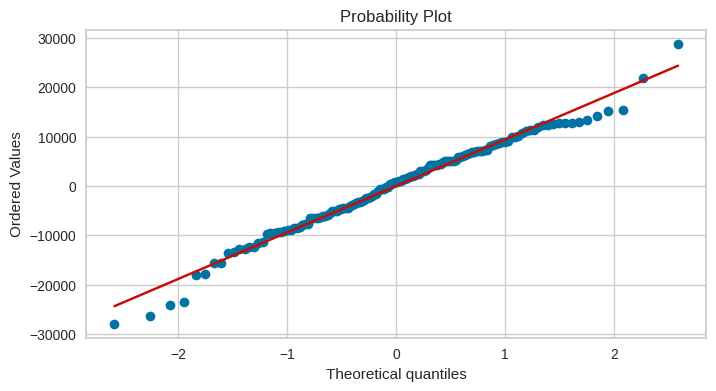

In [97]:
fig, ax = plt.subplots(figsize = (8,4))
stats.probplot(result.resid,plot = plt)

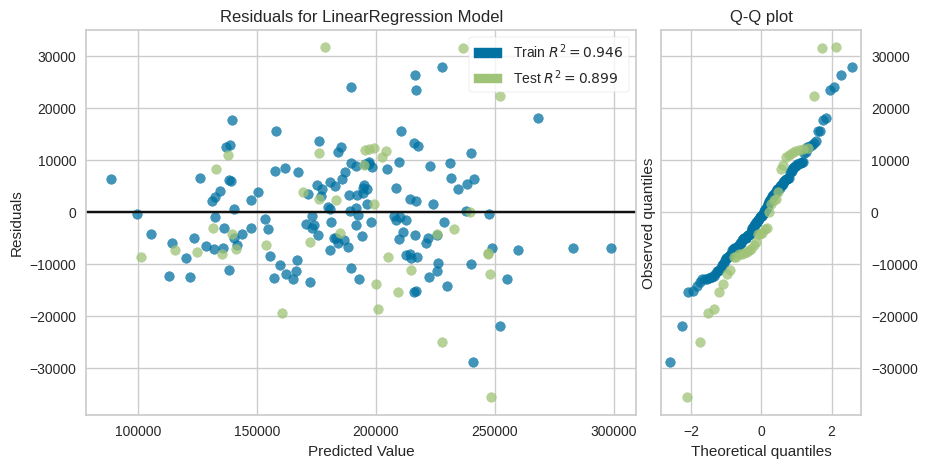

In [98]:
plt.figure(figsize=(10, 5));
viz = residuals_plot(lin_reg,
                     x_train_no_outlier,
                     y_train_no_outlier,
                     x_test_no_outlier,
                     y_test_no_outlier,
                     is_fitted = True, qqplot = True, hist = False)

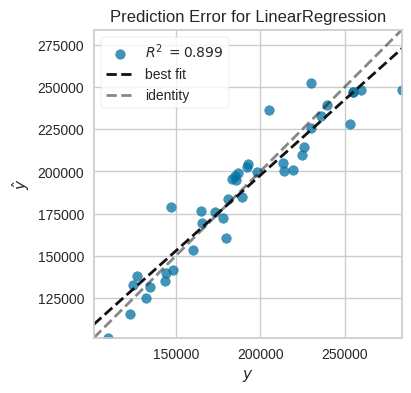

In [99]:
plt.figure(figsize = (8,4))
visualizer = prediction_error(lin_reg,
                              x_test_no_outlier,
                              y_test_no_outlier,
                              is_fitted = True)


In [100]:
prediction = result.predict(sm.add_constant(x_train_no_outlier))

mean_square_error = mean_squared_error(y_train_no_outlier, prediction)

In [101]:
prediction

1066    183098.783557
86      177069.366787
31      138306.989033
1110    180632.170649
1146    180613.209374
            ...      
1082    186705.506434
252     185471.670535
130     217394.662428
871     189723.039490
1095    173970.037260
Length: 142, dtype: float64

In [102]:
mean_square_error

87852179.24980223

In [103]:
R_squared = r2_score(y_train_no_outlier ,prediction)
R_squared

0.9460720367287949